## TØ4
I denne notebook skal du arbejde med

* at forstå hvad atomart potential er for en klynge af atomer (= potential energi af næste atom)

* 2D NumPy arrays

* konturplot

* 2D optimering med fmin

### Load kursets Lennard-Jones modul
Der er kommet nye funktioner i modulet, så det er vigtigt at det kommer til at virke. Hvis det ikke virker i Anaconda kan du prøve at flytte den allerede hentede pakke ved at skrive:
`!mv python23 python23crap`
Hvis det stadigt ikke virker må du udføre opgaven i colab.

In [1]:
%load_ext autoreload
%autoreload 2

import os
if not os.path.exists('python23'):
    !git clone https://github.com/uniblender/python23.git/ > git_output.txt
else:
    os.chdir('python23')
    !git pull 
    os.chdir('../')
!pip install python23/utils_package/ > pip_output.txt

from utils.lennard_jones import Atom, Atoms

Already up to date.


Load andre moduler

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Lav 6 koordinatsystemer på et lærred.

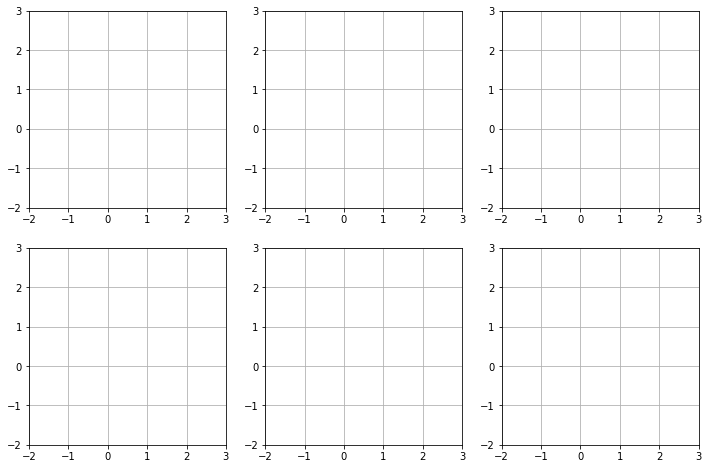

In [3]:
def tegn_forfra():
    fig, axes = plt.subplots(2,3,figsize=((12,8)))
    axes = axes.flatten()

    # tegn koordinatsystemer
    for ax in axes:
        ax.grid()
        ax.set_aspect('equal')
        xy_lims = [-2, 3]
        ax.set_xlim(xy_lims)
        ax.set_ylim(xy_lims)
    
    return fig, axes
fig, axes = tegn_forfra()

I sidste notebook fandt du at ligevægtslængden af en binding mellem to Lennard-Jones atomer er
$$r_0 = 2^{1/q}$$
hvor $q$ var et heltal (find tallet ved hjælp af Google og/eller Wikipedia hvis du ikke kan huske det). Indfør denne ligevægtslængde som en python-variabel, `r0`:

In [4]:
r0 = 2**(1/6)

Dan to atomer i positionerne:
$\left[\begin{array}{c}0\\r_0/2\end{array}\right]\>\mathrm{og}\>
\left[\begin{array}{c}0\\-r_0/2\end{array}\right]
$.

Sæt de to atomer sammen til et `Atoms`-objekt, `molekyle`. 

In [5]:
atom0 = Atom([0, r0/2])
atom1 = Atom([0, -r0/2])
molekyle = Atoms([atom0, atom1])

Check at energien af klyngen (det to-atomige molekyle, Lennard-Jones "dimeren") er $-1$. Husk på at `Atoms`-objekter har metoden `get_potential_energy()`

In [6]:
molekyle.get_potential_energy()

-1.0

Plot molekylet i de fem først af dine koordinatsystemer.

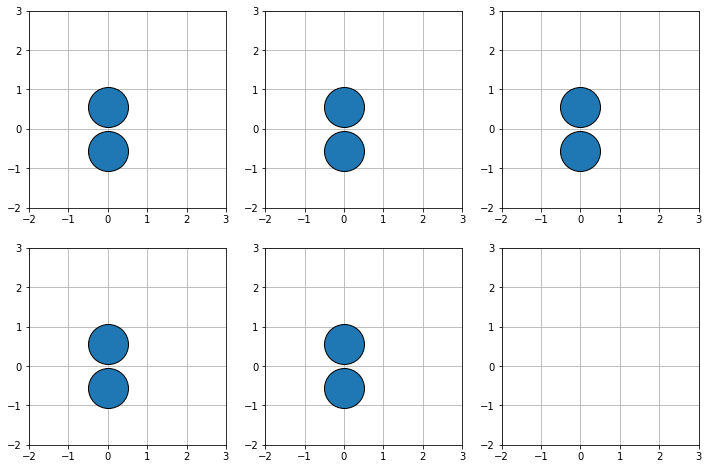

In [7]:
for ax in axes[:-1]:
    for atom in molekyle:
        atom.plot(ax)
fig

### Atomare potential

Nu skal vi undersøge den potentielle energi af et atom, der placeres i nærheden af molekylet. 

Start med at indføre et 3. atom i positionen, $\left[\begin{array}{c}3\\3\end{array}\right]$. Dan derefter et `Atoms`-objekt, `klynge`, der indeholder de to atomer fra `molekyle` samt det 3. atom.

In [8]:
atom2 = Atom([3, 3],color='C1')
klynge = Atoms([atom for atom in molekyle] + [atom2])

Plot klyngen i det første koordinatsystem

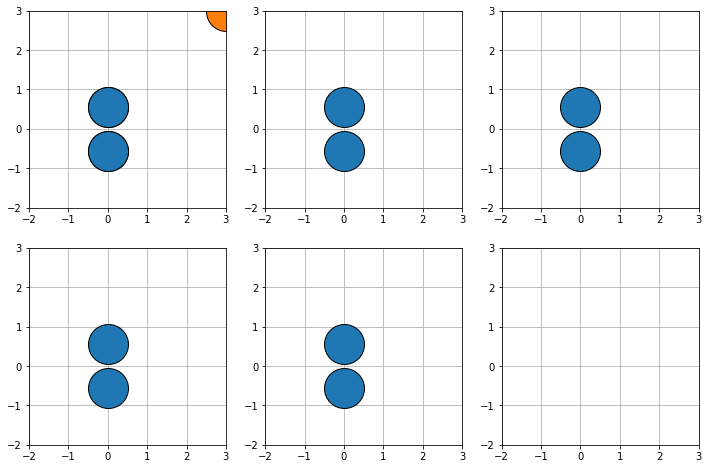

In [9]:
for atom in klynge:
    atom.plot(axes[0])
fig

Beregn energiforskellen mellem klyngen og molekylet

In [10]:
klynge.get_potential_energy() - molekyle.get_potential_energy()

-0.0015897074112176668

Denne energiforskel er den potentielle energi af det 3. atom når det placeres således i rummet i forhold til de to første atomer. Det kaldes også *det atomare potential*.

Du får 1.5 promille af den optimale energi i en Lennard-Jones binding, hvilket skyldes at det 3. atom er meget langt fra de to andre. I praksis er det atomare potential nul for det 3. atom på den position vi har valgt først.

Plot klyngen i det 2. plot

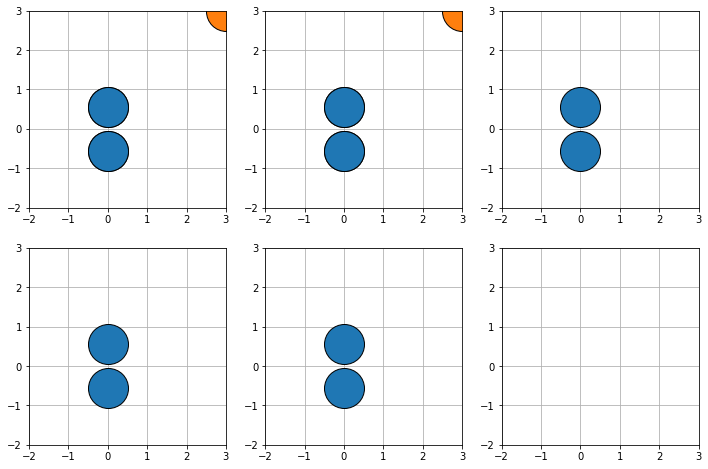

In [11]:
for atom in klynge:
    atom.plot(axes[1])
fig

Ryk nu atomet ind i positionen $\left[\begin{array}{c}1\\0\end{array}\right]$

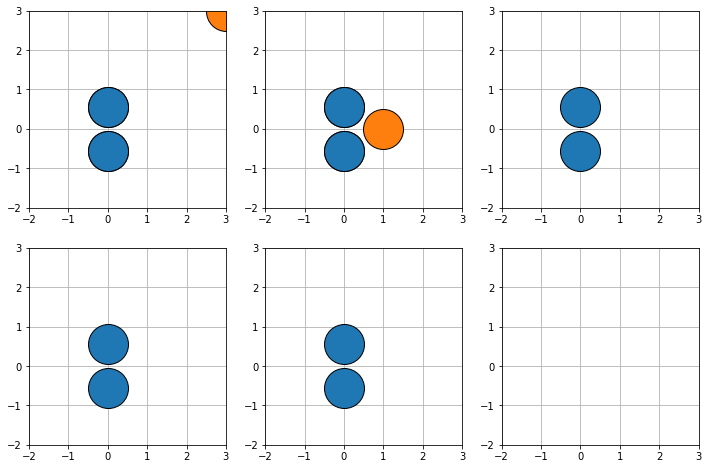

In [12]:
klynge[2].set_position([1,0])
fig

Beregn igen det atomare potential af det 3. atom (som forskellen mellem klyngens potentialenergi og molekylets potentialenergi)

In [13]:
klynge.get_potential_energy() - molekyle.get_potential_energy()

-1.9709950690104372

Forklar resultatet, der er tæt på $-2$.

På `Atoms`-objekter er der en metode, `get_atomic_potential(x,y)`, der giver det atomare potential for positionen $(x,y)$. Check denne metode for de to positioner hvor du kender resultatet.

In [14]:
molekyle.get_atomic_potential(3,3), molekyle.get_atomic_potential(1,0)

(array(-0.00158971), array(-1.97099507))

### Konturplot

Vi skal nu lave et konturplot af det atomare potential. Start med at sætte to matricer op så de dækker alle kombinationer af heltal for koordinaterne af det 3. atom

In [15]:
xm = np.array([[-2, -1,  0,  1,  2,  3],
        [-2, -1,  0,  1,  2,  3],
        [-2, -1,  0,  1,  2,  3],
        [-2, -1,  0,  1,  2,  3],
        [-2, -1,  0,  1,  2,  3],
        [-2, -1,  0,  1,  2,  3]])

ym = np.array([[-2, -2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3]])

Kald nu `get_atomic_potential()`-metoden for disse koordinater så du får det atomare potential på alle gitterpunkter i rummet. Inspicér tal-værdierne. Kan du finde dem du kender (for (3,3) og (1,0)) igen?

In [16]:
zm = molekyle.get_atomic_potential(xm,ym)
np.set_printoptions(precision=4, suppress=True)
zm

array([[   -0.0212,    -0.1427,    -0.4142,    -0.1427,    -0.0212,
           -0.004 ],
       [   -0.0685,    -1.0639, 78004.1412,    -1.0639,    -0.0685,
           -0.0078],
       [   -0.0983,    -1.971 ,  7936.    ,    -1.971 ,    -0.0983,
           -0.0099],
       [   -0.0685,    -1.0639, 78004.1412,    -1.0639,    -0.0685,
           -0.0078],
       [   -0.0212,    -0.1427,    -0.4142,    -0.1427,    -0.0212,
           -0.004 ],
       [   -0.0049,    -0.0135,    -0.0209,    -0.0135,    -0.0049,
           -0.0016]])

Nogle af tallene er ret store. Vi tager lige 10-talslogaritmen af alle positive tal:

In [17]:
zm[zm > 0] = np.log10(zm[zm > 0])
zm

array([[-0.0212, -0.1427, -0.4142, -0.1427, -0.0212, -0.004 ],
       [-0.0685, -1.0639,  4.8921, -1.0639, -0.0685, -0.0078],
       [-0.0983, -1.971 ,  3.8996, -1.971 , -0.0983, -0.0099],
       [-0.0685, -1.0639,  4.8921, -1.0639, -0.0685, -0.0078],
       [-0.0212, -0.1427, -0.4142, -0.1427, -0.0212, -0.004 ],
       [-0.0049, -0.0135, -0.0209, -0.0135, -0.0049, -0.0016]])

Plot nu et konturplot i 3. koordinatsystem.

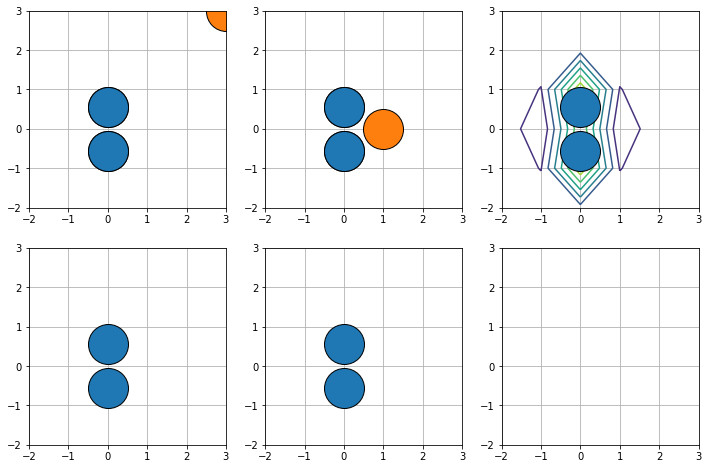

In [18]:
ax = axes[2]
ax.contour(xm, ym, zm)
fig

Kør næste celle for at få farvelagt områderne mellem konturlinierne

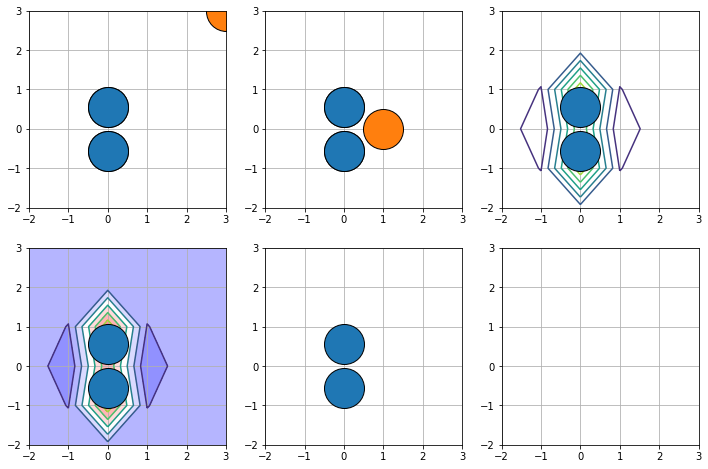

In [19]:
ax = axes[3]
ax.contour(xm, ym, zm)

ax.contourf(xm, ym, zm, alpha=0.5, cmap='bwr')

fig

Nu skal vi have pænere opløsning. Gør det samme igen, men for flere x- og y-koordinater

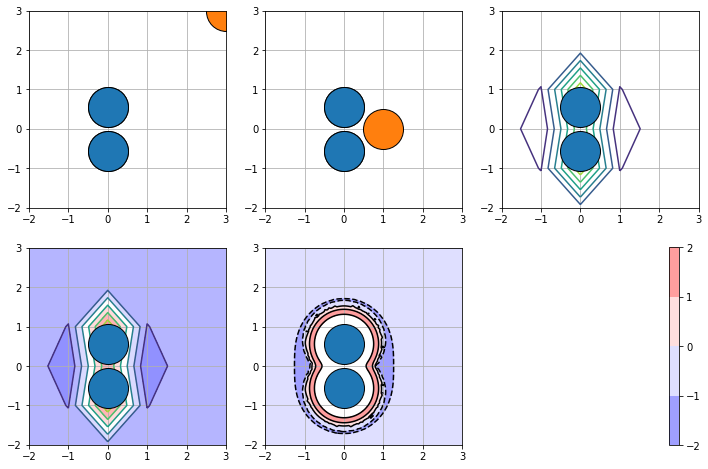

In [20]:
ax = axes[4]
        
xy_lims = [-2, 3]
xs = np.linspace(xy_lims[0], xy_lims[1], 100)
ys = np.linspace(xy_lims[0], xy_lims[1], 100)
xf, yf = np.meshgrid(xs, ys)

# Evaluate the function on the grid
zf = molekyle.get_atomic_potential(xf, yf)

zf[zf > 0] = np.log10(zf[zf > 0])

levels = [-2, -1, 0, 1, 2]

ax.contour(xf, yf, zf, levels=levels,colors='k')

color_map = ax.contourf(xf, yf, zf, levels=levels, alpha=0.5, cmap='bwr')

# sætter colorbar på nederst til højre og fjerner koordinatsystemet
cb = fig.colorbar(color_map,ax=axes[-1])
axes[-1].axis('off')

fig

### Optimering i 2D

Vi slutter af med at lade `fmin` finde de to optimale positioner af det 3. atom.

In [21]:
from scipy.optimize import fmin
p_opt = fmin(lambda p: molekyle.get_atomic_potential(p[0],p[1]), [-2,1])
p_opt

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 57
         Function evaluations: 109


array([-0.9721,  0.    ])

Indsæt et gult kryds på denne plads

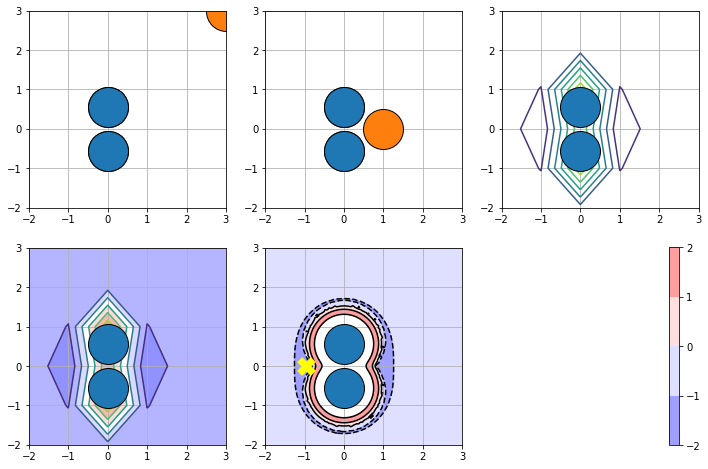

In [22]:
ax.scatter(p_opt[0], p_opt[1], s=300, marker='X', color='yellow', zorder=100)
fig

In [23]:
def plot_atomerne(ax,klynge):
    for atom in klynge:
        atom.set_color('C2')
        atom.plot(ax)

In [24]:
def plot_kontur(ax, klynge):
    xy_lims = [-2, 3]
    xs = np.linspace(xy_lims[0], xy_lims[1], 100)
    ys = np.linspace(xy_lims[0], xy_lims[1], 100)
    xf, yf = np.meshgrid(xs, ys)

    zf = klynge.get_atomic_potential(xf, yf)

    zf[zf > 0] = np.log10(zf[zf > 0])

    levels = [-2, -1, 0, 1, 2]

    ax.contour(xf, yf, zf, levels=levels,colors='k')

    ax.contourf(xf, yf, zf, levels=levels, alpha=0.5, cmap='bwr')

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 127
         Function evaluations: 239
Optimization terminated successfully.
         Current function value: -2.072984
         Iterations: 49
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: -2.104229
         Iterations: 63
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: -2.110765
         Iterations: 45
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: -2.113692
         Iterations: 50
         Function evaluations: 100
Optimization terminated successfully.
         Current function value: -2.191445
         Iterations: 57
         Function evaluations: 105


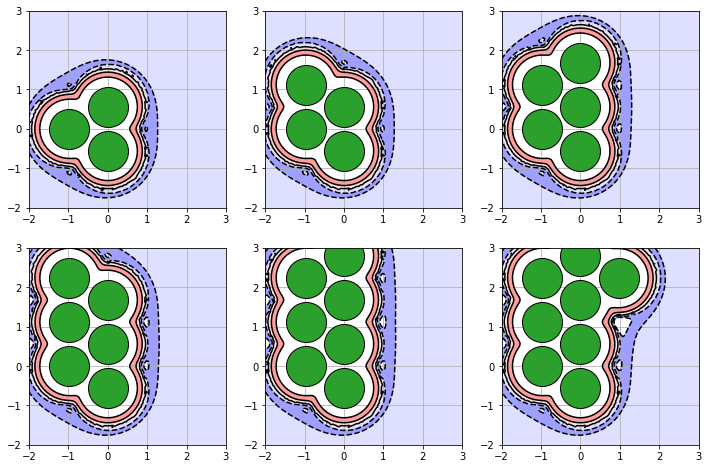

In [25]:
fig, axes = tegn_forfra()
klynge = Atoms([atom for atom in molekyle])
for ax in axes:
    p_opt = fmin(lambda p: klynge.get_atomic_potential(p[0],p[1]), [3,3])
    nyt_atom = Atom([p_opt[0], p_opt[1]],color='C1')
    klynge = Atoms([atom for atom in klynge] + [nyt_atom])
    plot_atomerne(ax, klynge)
    plot_kontur(ax, klynge)

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 60
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: -2.072989
         Iterations: 42
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: -2.104231
         Iterations: 81
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: -2.135656
         Iterations: 54
         Function evaluations: 103
Optimization terminated successfully.
         Current function value: -2.185030
         Iterations: 70
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: -2.119950
         Iterations: 39
         Function evaluations: 77


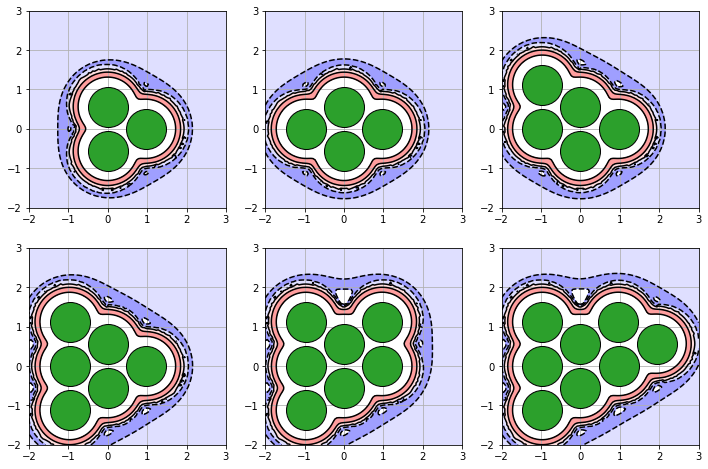

In [27]:
fig, axes = tegn_forfra()
klynge = Atoms([atom for atom in molekyle])
for ax in axes:
    p_opt = fmin(lambda p: klynge.get_atomic_potential(p[0],p[1]), 5*np.random.rand(2)-2)
    nyt_atom = Atom([p_opt[0], p_opt[1]],color='C1')
    klynge = Atoms([atom for atom in klynge] + [nyt_atom])
    plot_atomerne(ax, klynge)
    plot_kontur(ax, klynge)